## 12-1 datetime 오브젝트

#### datetime 오브젝트 사용하기

In [1]:
# datetime 라이브러리 불러오기
from datetime import datetime

In [2]:
# 현재 시간 출력
now1 = datetime.now()
print(now1)
now2 = datetime.today()
print(now2)

2020-07-14 18:39:09.918520
2020-07-14 18:39:09.918521


In [3]:
# 시간인자를 직접 입력
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)
print(t1)
print(t2)
print(t3)

2020-07-14 18:39:10.009756
1970-01-01 00:00:00
1970-12-12 13:24:34


In [4]:
# 시간 계산
diff1 = t1 - t2
print(diff1)
print(type(diff1))

18457 days, 18:39:10.009756
<class 'datetime.timedelta'>


In [5]:
diff2 = t2 - t1
print(diff2)
print(type(diff2))

-18458 days, 5:20:49.990244
<class 'datetime.timedelta'>


#### 문자열을 datetime 오브젝트로 변환하기

In [6]:
# 데이터 불러오기
import pandas as pd
import os

ebola = pd.read_csv('data/country_timeseries.csv')

In [7]:
# 문자열인 date 확인
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [8]:
# to_datetime 메서드로 변경
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [9]:
# to_datetime 메서드
test_df1 = pd.DataFrame({'order_day' : ['01/01/15', '02/01/15','03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format = '%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format = '%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format = '%y/%m/%d')

test_df1

,order_day,date_dt1,date_dt2,date_dt3
0,01/01/15,2015-01-01,2015-01-01,2001-01-15
1,02/01/15,2015-01-02,2015-02-01,2002-01-15
2,03/01/15,2015-01-03,2015-03-01,2003-01-15


In [10]:
test_df2 = pd.DataFrame({'order_day' : ['01-01-15', '02-01-15','03-01-15']})

test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format = '%d-%m-%y')
test_df2

,order_day,date_dt
0,01-01-15,2015-01-01
1,02-01-15,2015-01-02
2,03-01-15,2015-01-03


#### datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기

In [11]:
# parse_dates메서드로 데이터를 불러올때 바로 datetime 오브젝트로 지정
ebola1 = pd.read_csv('data/country_timeseries.csv', parse_dates=['Date'])
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

#### datetime 오브젝트에서 날짜 정보 추출하기

In [12]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
d1

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]

In [13]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


#### dt 접근자로 시계열 데이터 정리하기

In [14]:
# 에볼라데이터 불러오기
ebola = pd.read_csv('data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015-01-05
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015-01-04
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015-01-03
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,2014-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,2014-03-27
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-26
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-25
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-24


In [16]:
# index가 3인 데이터의 년월일 데이터 추출
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)
ebola[['Date','date_dt']].head()

2015
1
2


,Date,date_dt
0,1/5/2015,2015-01-05
1,1/4/2015,2015-01-04
2,1/3/2015,2015-01-03
3,1/2/2015,2015-01-02
4,12/31/2014,2014-12-31


In [18]:
# dt접근자로date_dt에 접근하여 year추출
ebola['year'] = ebola['date_dt'].dt.year
ebola[['Date','date_dt','year']]

,Date,date_dt,year
0,1/5/2015,2015-01-05,2015
1,1/4/2015,2015-01-04,2015
2,1/3/2015,2015-01-03,2015
3,1/2/2015,2015-01-02,2015
4,12/31/2014,2014-12-31,2014
...,...,...,...
117,3/27/2014,2014-03-27,2014
118,3/26/2014,2014-03-26,2014
119,3/25/2014,2014-03-25,2014
120,3/24/2014,2014-03-24,2014


In [19]:
# 위의 과정을 응용하여 월 일 데이터를 한번에 추출
ebola['month'], ebola['day'] = (
    ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
ebola[['Date', 'date_dt', 'year', 'month', 'day']]

,Date,date_dt,year,month,day
0,1/5/2015,2015-01-05,2015,1,5
1,1/4/2015,2015-01-04,2015,1,4
2,1/3/2015,2015-01-03,2015,1,3
3,1/2/2015,2015-01-02,2015,1,2
4,12/31/2014,2014-12-31,2014,12,31
...,...,...,...,...,...
117,3/27/2014,2014-03-27,2014,3,27
118,3/26/2014,2014-03-26,2014,3,26
119,3/25/2014,2014-03-25,2014,3,25
120,3/24/2014,2014-03-24,2014,3,24


In [20]:
# 정보확인
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

## 12-2 사례별 시계열 데이터 계산하기

#### 에볼라 최초 발병일 계산하기

In [21]:
ebola.iloc[-5:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,3/27/2014,5,103.0,8.0,6.0
118,3/26/2014,4,86.0,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN


In [22]:
# 에볼라 최초 발병일 확인
print(type(ebola['date_dt'].min()))
ebola['date_dt'].min()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Timestamp('2014-03-22 00:00:00')

In [23]:
# 에볼라 진행정도
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
ebola[['Date','day','outbreak_d']]

,Date,day,outbreak_d
0,1/5/2015,5,289 days
1,1/4/2015,4,288 days
2,1/3/2015,3,287 days
3,1/2/2015,2,286 days
4,12/31/2014,31,284 days
...,...,...,...
117,3/27/2014,27,5 days
118,3/26/2014,26,4 days
119,3/25/2014,25,3 days
120,3/24/2014,24,2 days


#### 파산한 은행의 개수 계산하기

In [24]:
# 데이터 불러오기
banks = pd.read_csv('data/banklist.csv')
banks

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17
...,...,...,...,...,...,...,...
550,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14
551,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,18-Nov-02
552,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,18-Feb-03
553,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,17-Mar-05


In [25]:
# 날짜 데이터가 있음
banks_no_dates = pd.read_csv('data/banklist.csv')
banks_no_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


In [28]:
# 다시 불러오기
banks = pd.read_csv('data/banklist.csv', parse_dates=[5, 6])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


In [29]:
# 은행이 파산한 분기 확인
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
banks

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20,4,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20,4,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,2,2017
...,...,...,...,...,...,...,...,...,...
550,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2001-07-27,2014-08-19,3,2001
551,Malta National Bank,Malta,OH,6629,North Valley Bank,2001-05-03,2002-11-18,2,2001
552,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2001-02-02,2003-02-18,1,2001
553,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,2000-12-14,2005-03-17,4,2000


In [30]:
# 연도별로 파산한 은행의 수
closing_year = banks.groupby(['closing_year']).size()
closing_year

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64

In [31]:
# 연도별 분기별로 파산한 은행의 개수
closing_year_q = banks.groupby(['closing_year','closing_quarter']).size()
closing_year_q

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

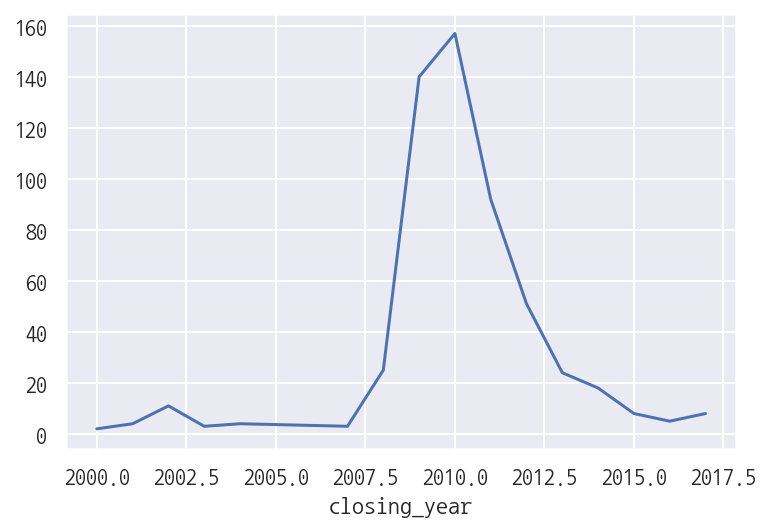

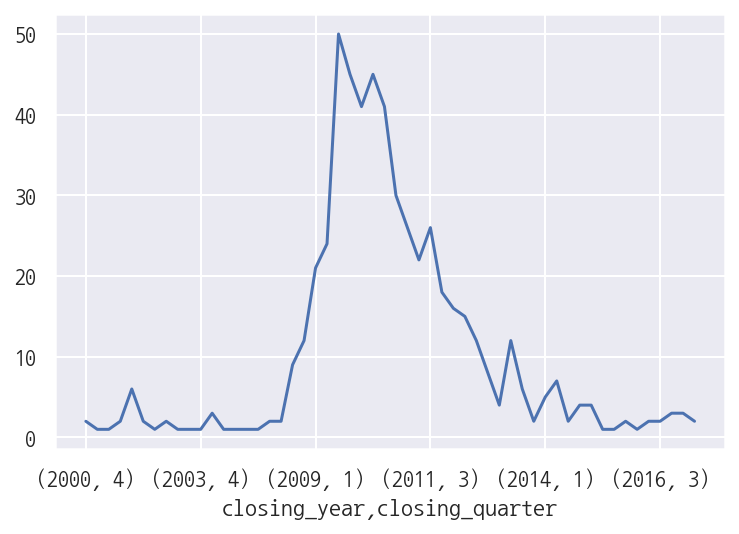

In [33]:
# 그래프로 보기
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax = closing_year.plot()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

#### 테슬라 주식 데이터로 시간 계산하기

In [34]:
# pandas-datareader 라이브러리를 이용하여 주식데이터 불러오기
!pip install pandas-datareader

ERROR: Could not find a version that satisfies the requirement pandas-datereader (from versions: none)
ERROR: No matching distribution found for pandas-datereader


In [ ]:
# 테슬라 주식 데이터 내려받기
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

tesla = pdr.get_data_quandl('TSLA', api_key = '')
tesla.to_csv('data/tesla_stock_quandl.csv')

In [36]:
tesla = pd.read_csv('data/tesla_stock_quandl.csv')
tesla

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
0,2018-03-27,304.00,304.2700,277.18,279.18,13696168.0,0.0,1.0,304.00,304.2700,277.18,279.18,13696168.0
1,2018-03-26,307.34,307.5900,291.36,304.18,8324639.0,0.0,1.0,307.34,307.5900,291.36,304.18,8324639.0
2,2018-03-23,311.25,311.6100,300.45,301.54,6600538.0,0.0,1.0,311.25,311.6100,300.45,301.54,6600538.0
3,2018-03-22,313.89,318.8200,308.18,309.10,4914307.0,0.0,1.0,313.89,318.8200,308.18,309.10,4914307.0
4,2018-03-21,310.25,322.4400,310.19,316.53,5927881.0,0.0,1.0,310.25,322.4400,310.19,316.53,5927881.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0
1945,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
1946,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
1947,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0


In [38]:
# date 열을 datetime 행을변환
tesla = pd.read_csv('data/tesla_stock_quandl.csv', parse_dates=[0])
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB


In [39]:
# 2010년 6월 데이터만보기
tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)]

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
1947,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
1948,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0


#### datetime 오브젝트를 인덱스로 설정해 데이터 추출하기

In [40]:
# date열을 tesla 데이터프레임의 인덱스로 지정
tesla.index = tesla['Date']
tesla.index

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)

In [41]:
# 2015년 데이터 추출
tesla['2015'].iloc[:5, :5]

,Date,Open,High,Low,Close
Date,,,,,
2015-12-31,2015-12-31,238.51,243.450,238.3700,240.01
2015-12-30,2015-12-30,236.60,243.634,235.6707,238.09
2015-12-29,2015-12-29,230.06,237.720,229.5470,237.19
2015-12-28,2015-12-28,231.49,231.980,225.5400,228.95
2015-12-24,2015-12-24,230.56,231.880,228.2800,230.57


In [42]:
# 2010년 6월 데이터 추출
tesla['2010-06'].iloc[:, :5]

,Date,Open,High,Low,Close
Date,,,,,
2010-06-30,2010-06-30,25.79,30.4192,23.30,23.83
2010-06-29,2010-06-29,19.00,25.0000,17.54,23.89


#### 시간간격을 인덱스로 지정해 데이터 추출하기

In [44]:
# date 열에서 date열의 최솟값을 뺀 다음 ref_date열로 추가
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
tesla

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,ref_date
Date,,,,,,,,,,,,,,
2018-03-27,2018-03-27,304.00,304.2700,277.18,279.18,13696168.0,0.0,1.0,304.00,304.2700,277.18,279.18,13696168.0,2828 days
2018-03-26,2018-03-26,307.34,307.5900,291.36,304.18,8324639.0,0.0,1.0,307.34,307.5900,291.36,304.18,8324639.0,2827 days
2018-03-23,2018-03-23,311.25,311.6100,300.45,301.54,6600538.0,0.0,1.0,311.25,311.6100,300.45,301.54,6600538.0,2824 days
2018-03-22,2018-03-22,313.89,318.8200,308.18,309.10,4914307.0,0.0,1.0,313.89,318.8200,308.18,309.10,4914307.0,2823 days
2018-03-21,2018-03-21,310.25,322.4400,310.19,316.53,5927881.0,0.0,1.0,310.25,322.4400,310.19,316.53,5927881.0,2822 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-07-06,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,7 days
2010-07-02,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,3 days
2010-07-01,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2 days


In [45]:
# 시간 간격을 이용하여 데이터 추출
tesla.index = tesla['ref_date']
tesla.iloc[:5, :5]
tesla

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,ref_date
ref_date,,,,,,,,,,,,,,
2828 days,2018-03-27,304.00,304.2700,277.18,279.18,13696168.0,0.0,1.0,304.00,304.2700,277.18,279.18,13696168.0,2828 days
2827 days,2018-03-26,307.34,307.5900,291.36,304.18,8324639.0,0.0,1.0,307.34,307.5900,291.36,304.18,8324639.0,2827 days
2824 days,2018-03-23,311.25,311.6100,300.45,301.54,6600538.0,0.0,1.0,311.25,311.6100,300.45,301.54,6600538.0,2824 days
2823 days,2018-03-22,313.89,318.8200,308.18,309.10,4914307.0,0.0,1.0,313.89,318.8200,308.18,309.10,4914307.0,2823 days
2822 days,2018-03-21,310.25,322.4400,310.19,316.53,5927881.0,0.0,1.0,310.25,322.4400,310.19,316.53,5927881.0,2822 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7 days,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,7 days
3 days,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,3 days
2 days,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2 days


In [46]:
# 최초 5일 추출
tesla['5 days':].iloc[:5, :5]
tesla

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,ref_date
ref_date,,,,,,,,,,,,,,
2828 days,2018-03-27,304.00,304.2700,277.18,279.18,13696168.0,0.0,1.0,304.00,304.2700,277.18,279.18,13696168.0,2828 days
2827 days,2018-03-26,307.34,307.5900,291.36,304.18,8324639.0,0.0,1.0,307.34,307.5900,291.36,304.18,8324639.0,2827 days
2824 days,2018-03-23,311.25,311.6100,300.45,301.54,6600538.0,0.0,1.0,311.25,311.6100,300.45,301.54,6600538.0,2824 days
2823 days,2018-03-22,313.89,318.8200,308.18,309.10,4914307.0,0.0,1.0,313.89,318.8200,308.18,309.10,4914307.0,2823 days
2822 days,2018-03-21,310.25,322.4400,310.19,316.53,5927881.0,0.0,1.0,310.25,322.4400,310.19,316.53,5927881.0,2822 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7 days,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,7 days
3 days,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,3 days
2 days,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2 days


#### 시간 범위 생성해 인덱스로 지정하기

In [48]:
# 데이터 누락 확인
ebola = pd.read_csv('data/country_timeseries.csv', parse_dates=[0])
ebola.iloc[:5,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [49]:
# 뒤에 누락 데이터 확인
ebola.iloc[-5:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


In [51]:
# 2014년 12월 31일부터 2015년 1월 5일 사이의 인덱스 생성
head_range = pd.date_range(start = '2014-12-31', end = '2015-01-05')
head_range

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

In [52]:
# 새로운 데이터 프레임 생성
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
ebola_5.iloc[:5,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0
2015-01-02,2015-01-02,286,NaN,8157.0,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0


#### 에볼라의 확산속도 비교하기

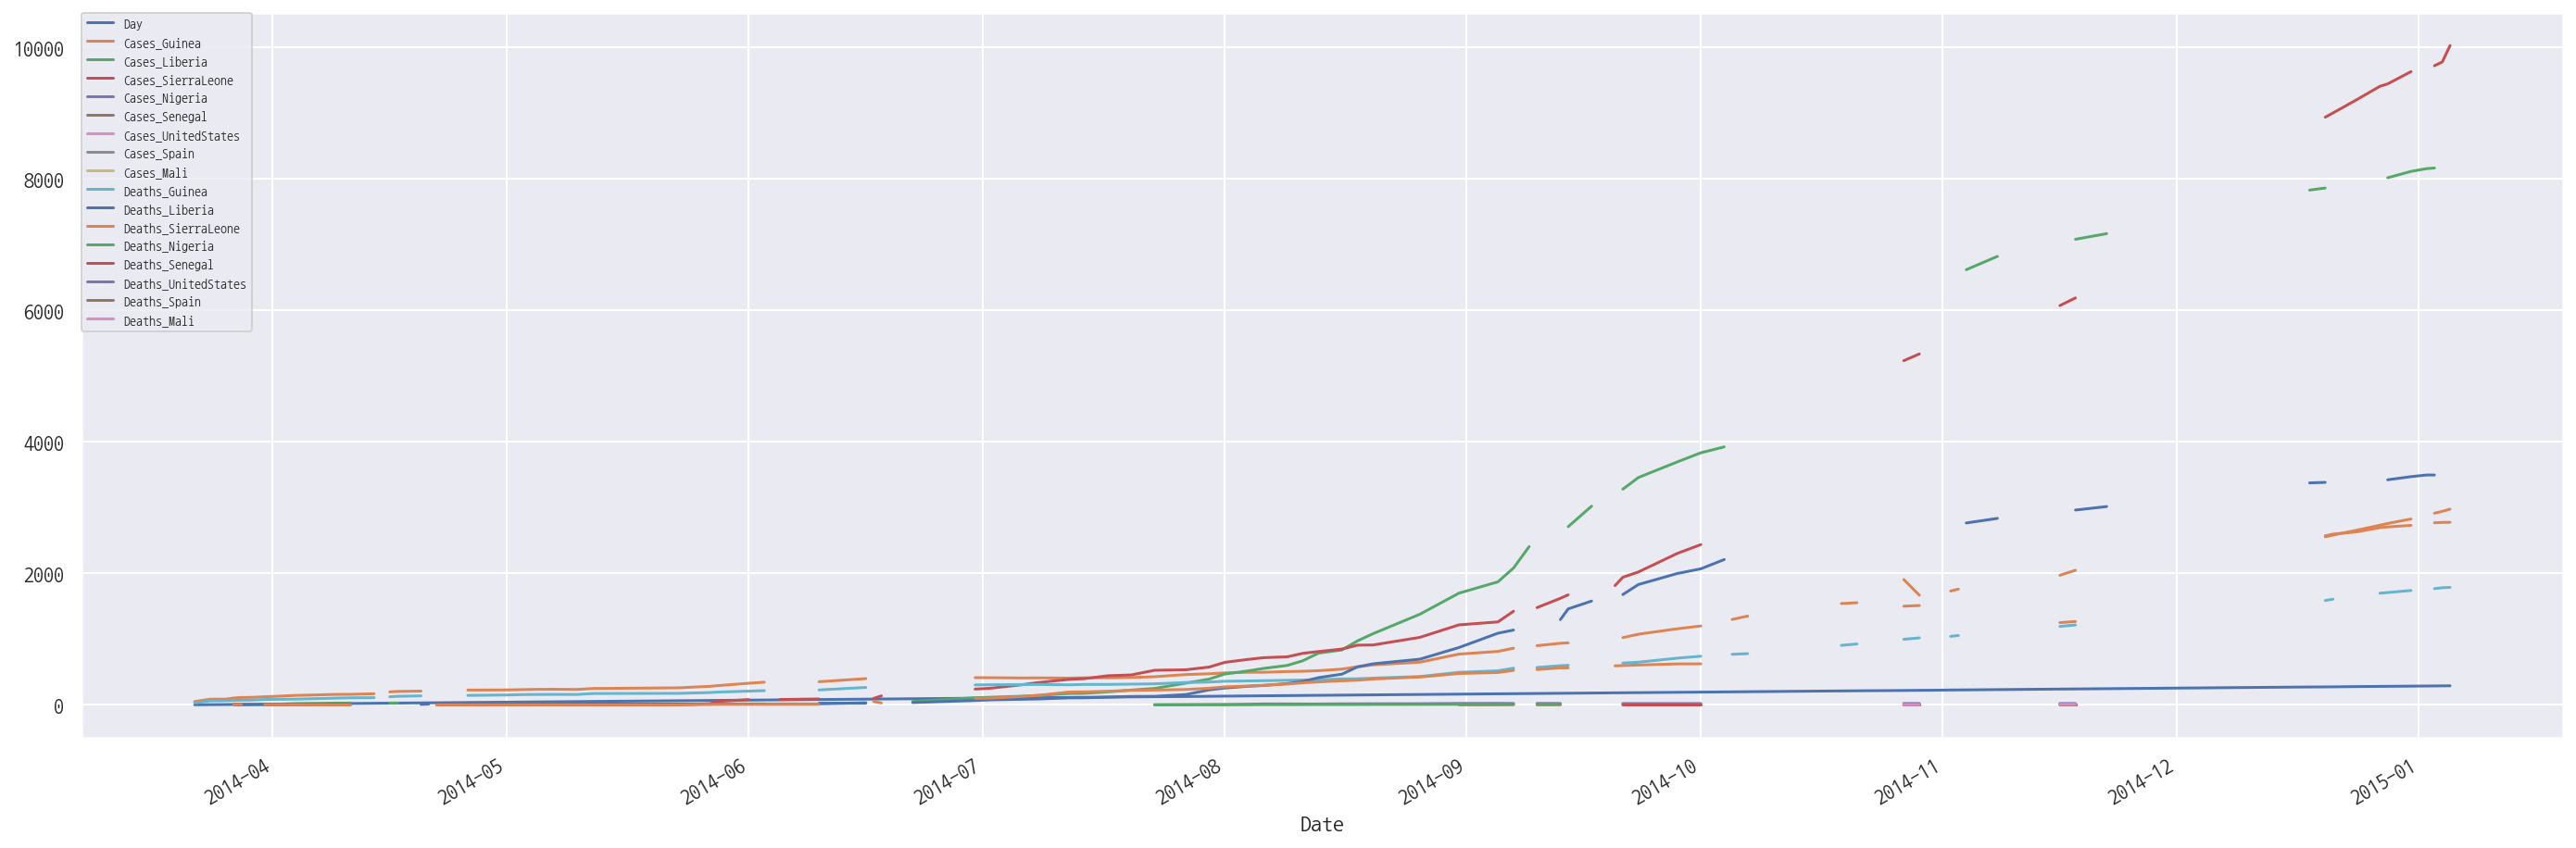

In [54]:
# 그래프 그리기
import matplotlib.pyplot as plt
%matplotlib inline

ebola.index = ebola['Date']

fig, ax = plt.subplots(figsize = (24,8))
ax = ebola.iloc[0:, 1:].plot(ax = ax)
ax.legend(fontsize = 7, loc = 2, borderaxespad=0.)
plt.show()

In [56]:
# 발병일을 동일하게 만들기
ebola_sub = ebola[['Day','Cases_Guinea','Cases_Liberia']]
ebola_sub.tail(10)

,Day,Cases_Guinea,Cases_Liberia
Date,,,
2014-04-04,13,143.0,18.0
2014-04-01,10,127.0,8.0
2014-03-31,9,122.0,8.0
2014-03-29,7,112.0,7.0
2014-03-28,6,112.0,3.0
2014-03-27,5,103.0,8.0
2014-03-26,4,86.0,NaN
2014-03-25,3,86.0,NaN
2014-03-24,2,86.0,NaN


In [60]:
# 그래프를 그리기 위한 데이터프레임 준비
ebola = pd.read_csv('data/country_timeseries.csv', parse_dates=['Date'])
ebola.head().iloc[:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [61]:
ebola.tail().iloc[:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


In [66]:
# new index 생성
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())
new_idx

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')

In [67]:
# 시간 순서가 반대여서 뒤집음
new_idx = reversed(new_idx)

In [69]:
# 인덱스 설정
ebola = ebola.reindex(new_idx)
ebola.head().iloc[:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN


In [71]:
ebola.tail().iloc[:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2014-03-26,2014-03-26,4.0,86.0,NaN,NaN
2014-03-25,2014-03-25,3.0,86.0,NaN,NaN
2014-03-24,2014-03-24,2.0,86.0,NaN,NaN
2014-03-23,NaT,NaN,NaN,NaN,NaN
2014-03-22,2014-03-22,0.0,49.0,NaN,NaN


In [72]:
# 각 나라의 발병일 옮기기
last_valid = ebola.apply(pd.Series.last_valid_index)
last_valid

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]

In [73]:
first_valid = ebola.apply(pd.Series.first_valid_index)
first_valid

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]

In [74]:
# 각 나라의 에볼라 발병일을 동일한 출발선으로 옮김
earliest_date = ebola.index.min()
earliest_date

Timestamp('2014-03-22 00:00:00')

In [75]:
shift_values = last_valid - earliest_date
shift_values

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]

In [77]:
# 옮기기
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted

In [78]:
# 변환
ebola_shift = pd.DataFrame(ebola_dict)
ebola_shift

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2015-01-05,2015-01-05,289.0,2776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288.0,2775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287.0,2769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-26,2014-03-26,4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
2014-03-25,2014-03-25,3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2014-03-24,2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# index를 day열로 지정 및 필요없는 열 삭제
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date','Day'], axis = 1)
ebola_shift

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Day,,,,,,,,,,,,,,,,
289.0,2776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288.0,2775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287.0,2769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


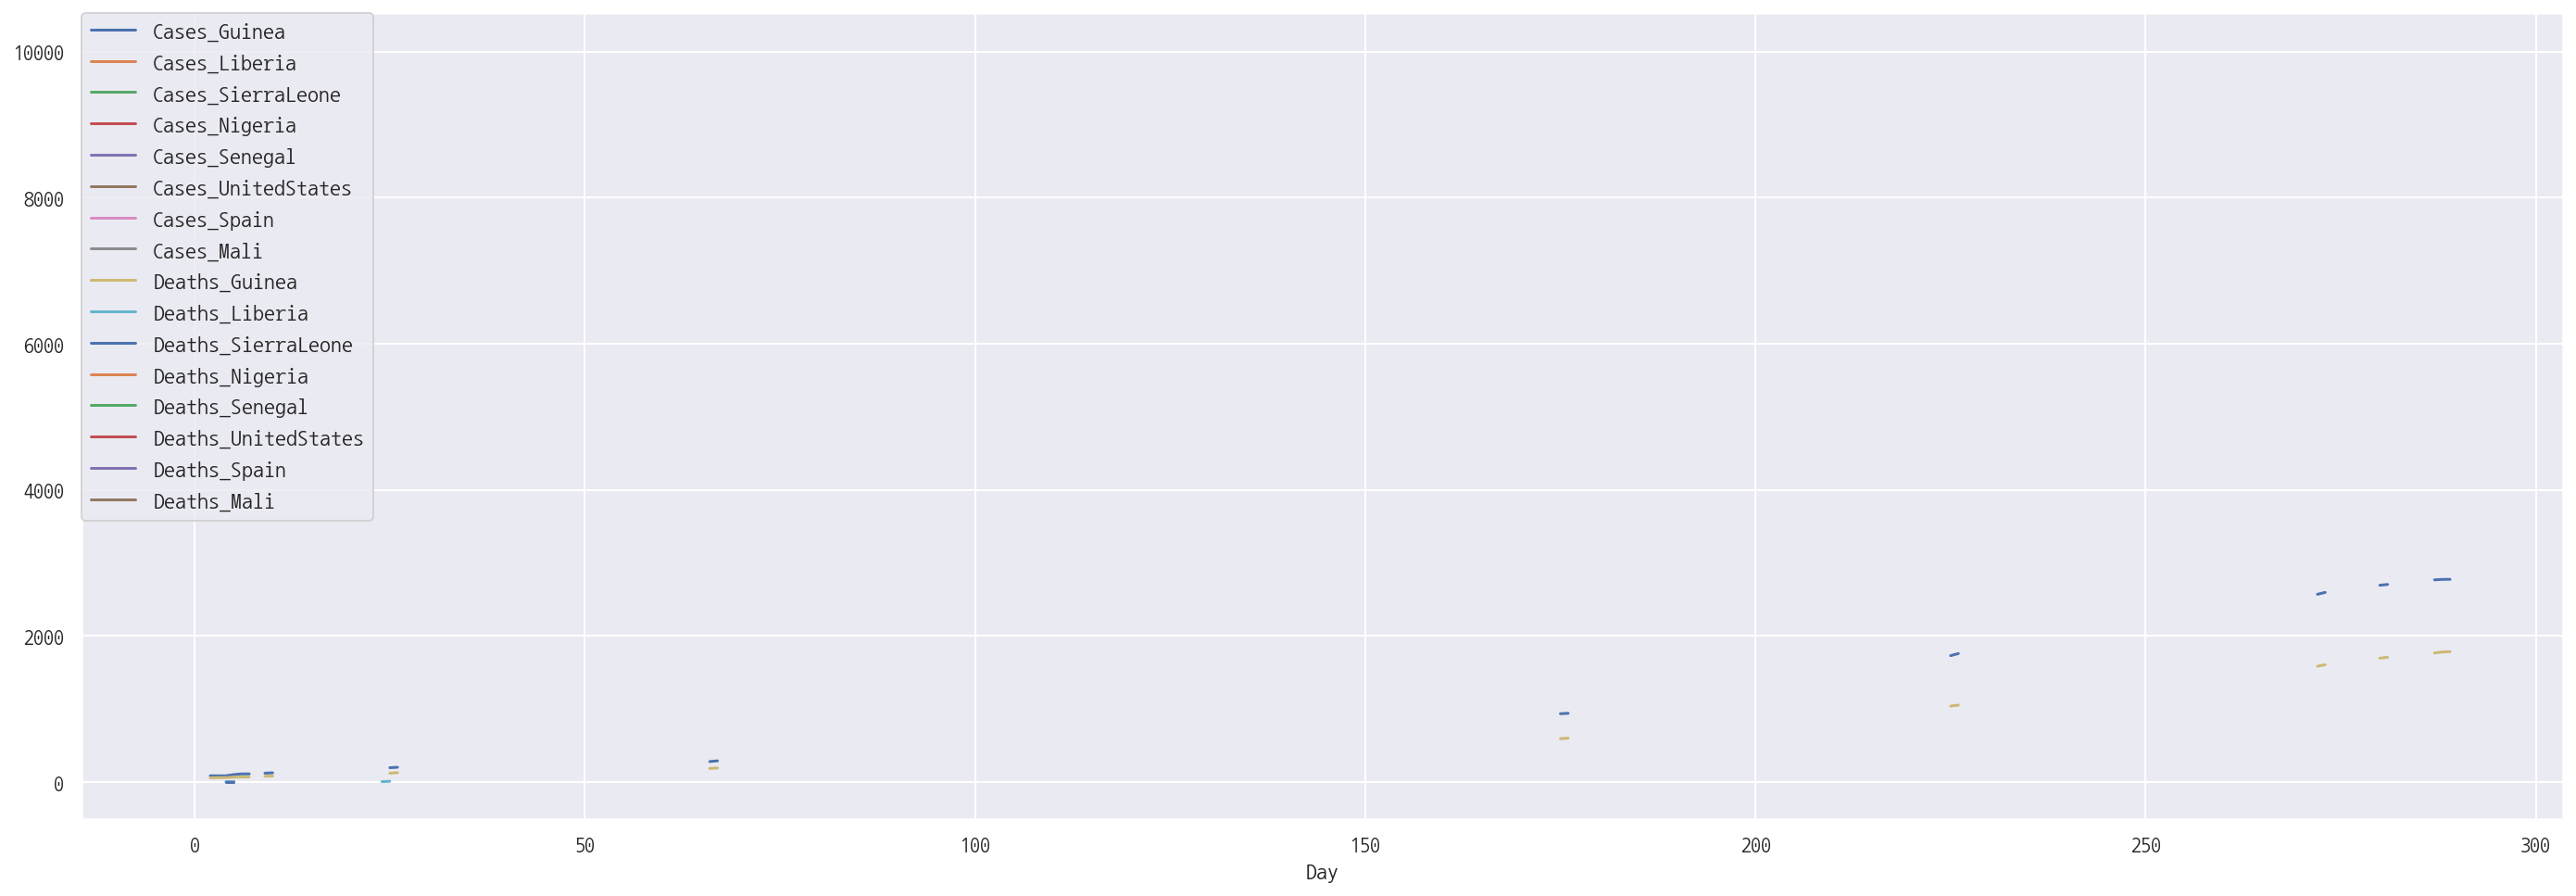

In [81]:
# 그리기
fig, ax = plt.subplots(figsize = (24, 8))
ax = ebola_shift.iloc[:,:].plot(ax = ax)
ax.legend(fontsize = 12, loc=2, borderaxespad =0.)
plt.show()